<a href="https://www.kaggle.com/code/alnourabdalrahman9/salifort-motors-employees-churn-prediction?scriptVersionId=181739205" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Capstone project: Providing data-driven suggestions for HR**

# **Using the PACE workflow for this project**

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve the employees satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it.
They have the following question: what’s likely to make the employee leave the company?

my goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

BY predicting if an employees is likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Let's explore the data

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
# Model
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from xgboost import plot_importance
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("/kaggle/input/hr-data/HR_comma_sep.csv")

# Display first 5 rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

In [3]:
# Basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Descriptive statistics about the data
df0.describe(include = 'all')

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

### Rename columns

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns 
df0 = df0.rename(columns={'satisfaction_level': 'satisfaction',
                           'number_project': 'projects',
                           'average_montly_hours': 'avg_monthly_hrs',
                           'time_spend_company': 'tenure',
                           'Work_accident': 'work_accident',
                           'Department': 'department'})

# Display the new names
df0.columns

Index(['satisfaction', 'last_evaluation', 'projects', 'avg_monthly_hrs',
       'tenure', 'work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction             0
last_evaluation          0
projects                 0
avg_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

**There are no missing data**

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

We've identified 3008 duplicates in our dataset that need to be removed.

In [9]:
# Drop duplicates and save resulting dataframe in a new variable
print(df0.shape)
df1 = df0.drop_duplicates().reset_index(drop=True)

# Display the dataframe shape after eliminating the duplicates
print(df1.shape)

(14999, 10)
(11991, 10)


### Check outliers

<Axes: >

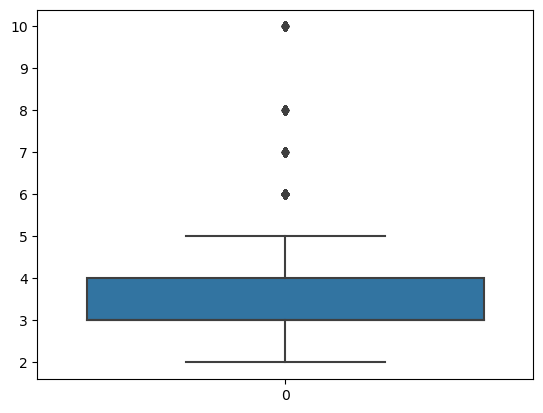

In [10]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1['tenure'])

### Check Column Data Type

In [11]:
# Check current data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction           11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   projects               11991 non-null  int64  
 3   avg_monthly_hrs        11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [12]:
# Convert to category
df1['department'] = df1['department'].astype('category')
df1['salary'] = df1['salary'].astype('category')

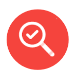
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

### Data visualizations

**Let's visualize the distribution of data in the 'left' column using a pie chart**

<Axes: >

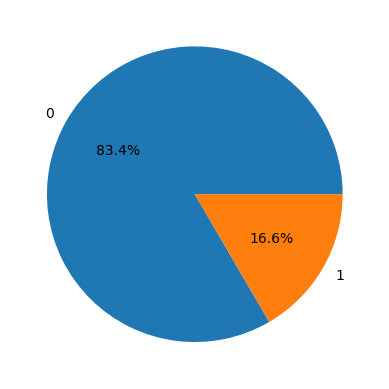

In [13]:
df1.groupby('left').size().plot(kind='pie',autopct='%1.1f%%')

**The pie chart indicates an underrepresentation of the data for employees who left. We might consider oversampling this category later to address the imbalance.**

<Axes: xlabel='salary', ylabel='Count'>

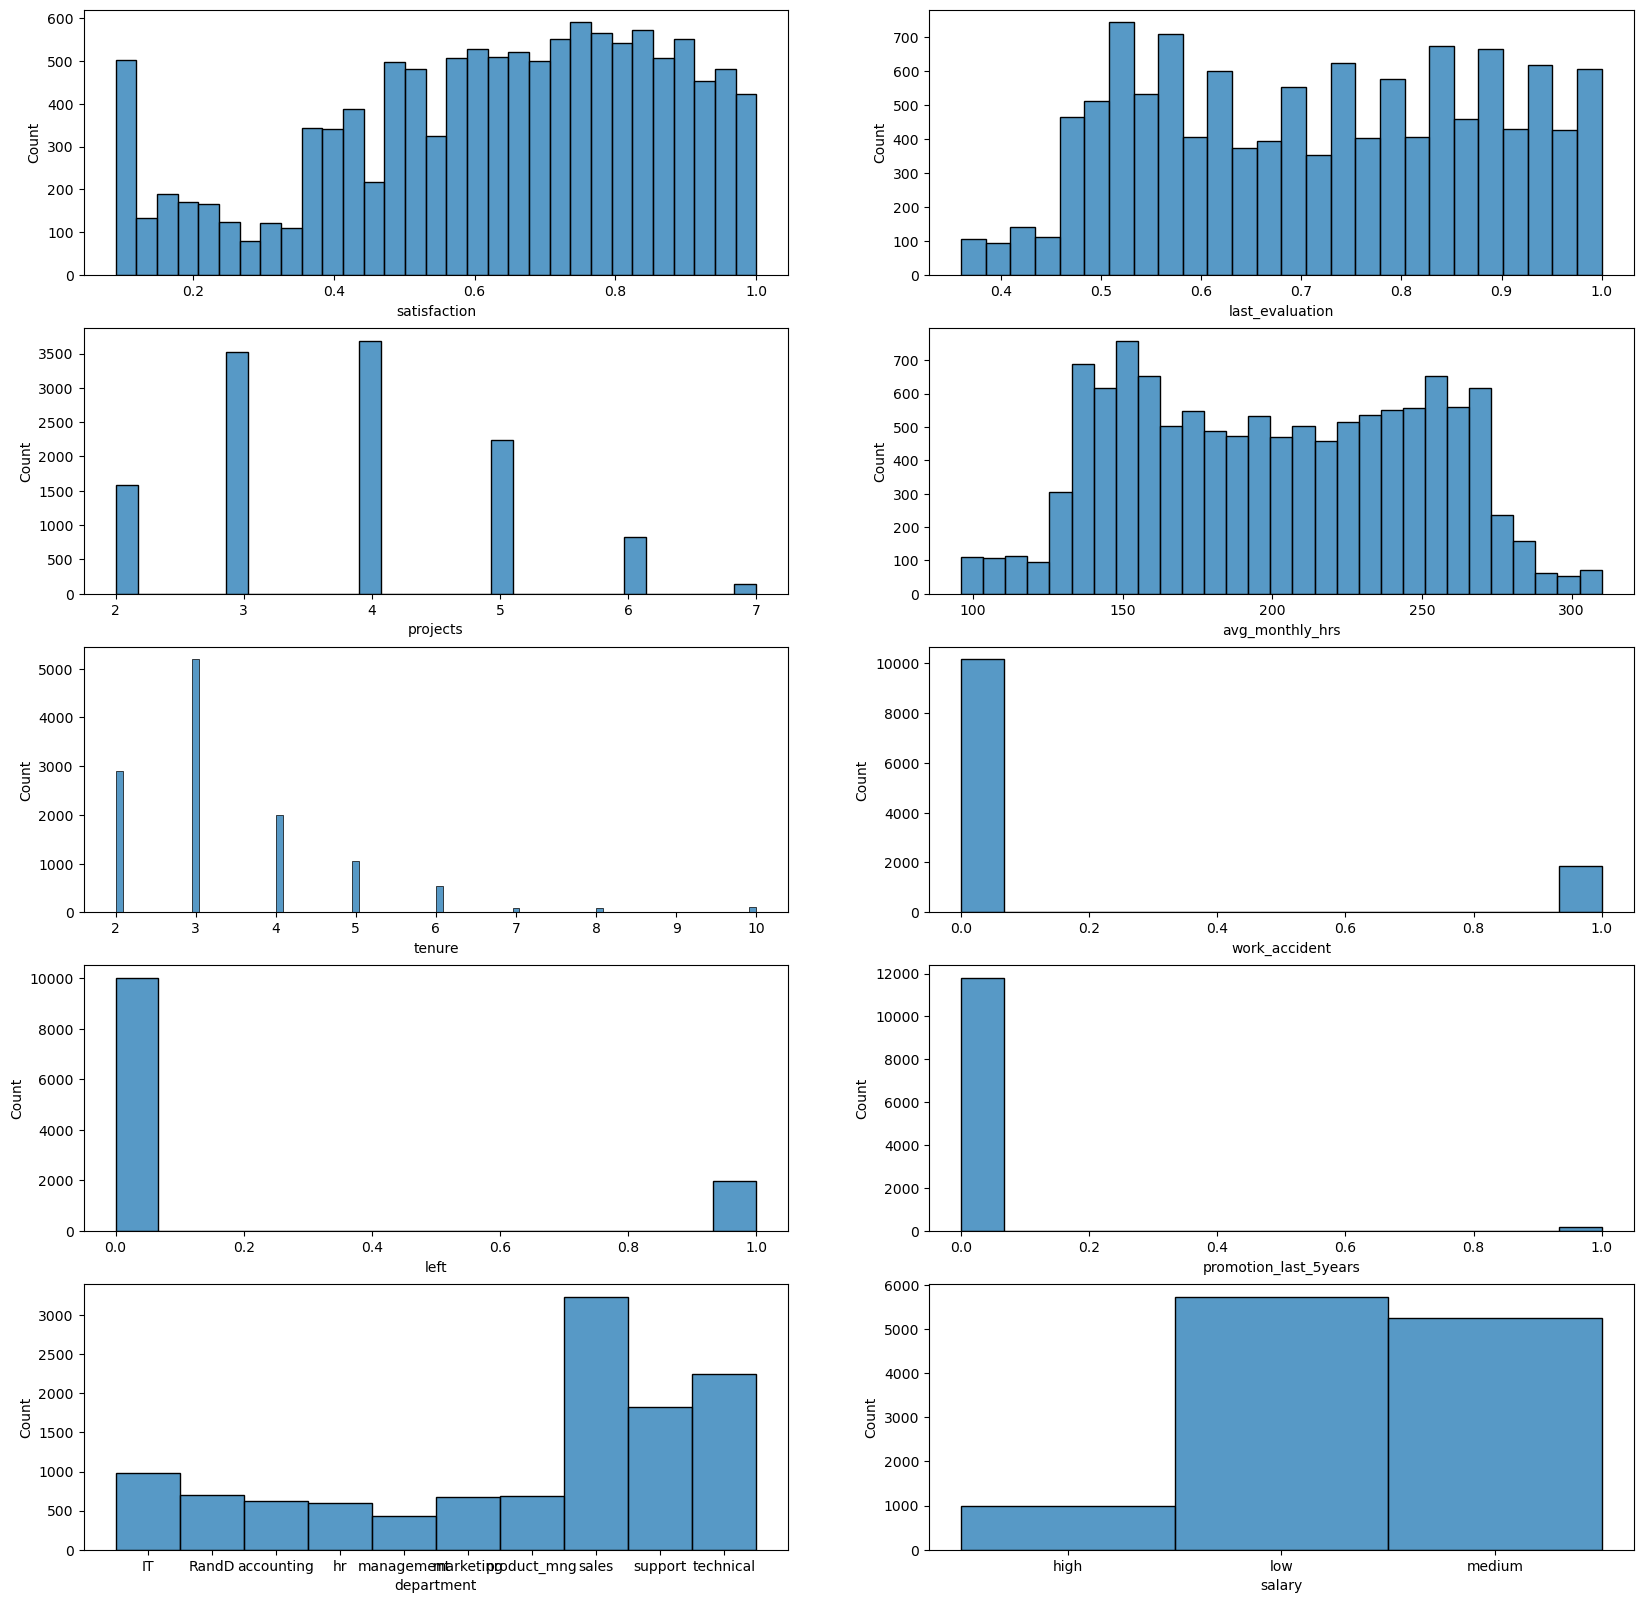

In [14]:
# Histogram subplots of all columns
fig, axes = plt.subplots(5,2,figsize=(20,20))
sns.histplot(df1['satisfaction'], ax = axes[0][0])
sns.histplot(df1['last_evaluation'], ax = axes[0][1])
sns.histplot(df1['projects'], ax = axes[1][0])
sns.histplot(df1['avg_monthly_hrs'], ax = axes[1][1])
sns.histplot(df1['tenure'], ax = axes[2][0])
sns.histplot(df1['work_accident'], ax = axes[2][1])
sns.histplot(df1['left'], ax = axes[3][0])
sns.histplot(df1['promotion_last_5years'], ax = axes[3][1])
sns.histplot(df1['department'], ax = axes[4][0])
sns.histplot(df1['salary'], ax = axes[4][1])

<Axes: xlabel='satisfaction', ylabel='avg_monthly_hrs'>

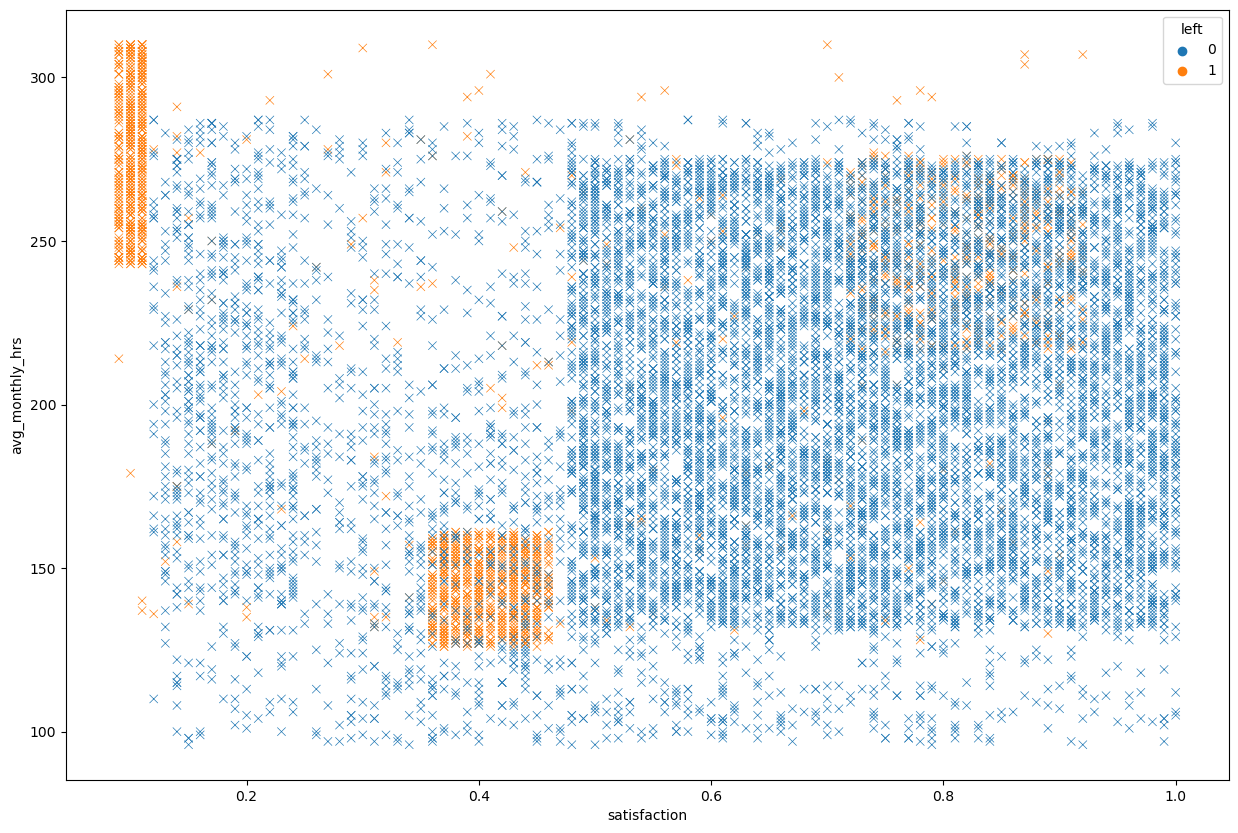

In [15]:
# Scatterplot of 'satisfaction' vs 'avg_monthly_hrs' with 'left' as hue
plt.figure(figsize=(15,10))
sns.scatterplot(x=df1['satisfaction'], y=df1['avg_monthly_hrs'], hue=df1['left'], marker='x')

<Axes: xlabel='satisfaction', ylabel='projects'>

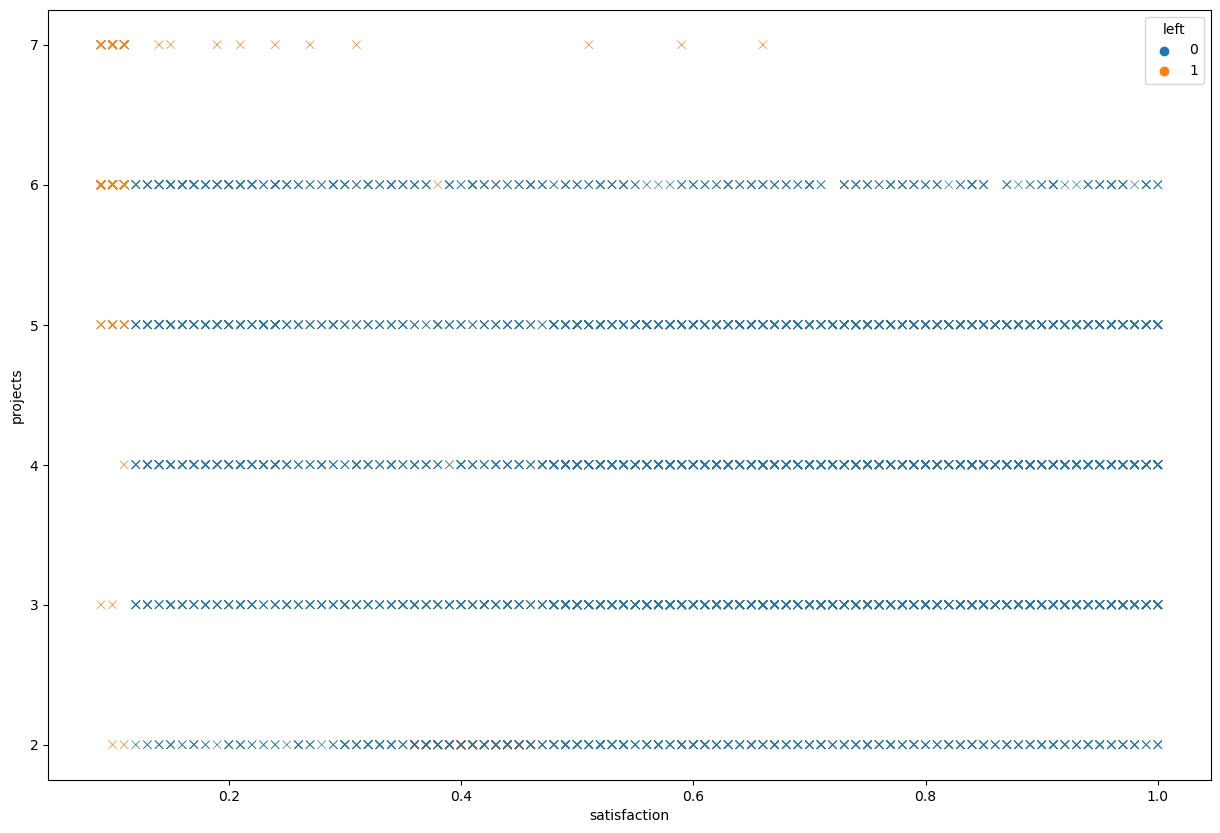

In [16]:
# Scatterplot of 'satisfaction' vs 'projects' with 'left' as hue
plt.figure(figsize=(15,10))
sns.scatterplot(x=df1['satisfaction'], y=df1['projects'], hue=df1['left'], marker='x')

<Axes: xlabel='satisfaction', ylabel='last_evaluation'>

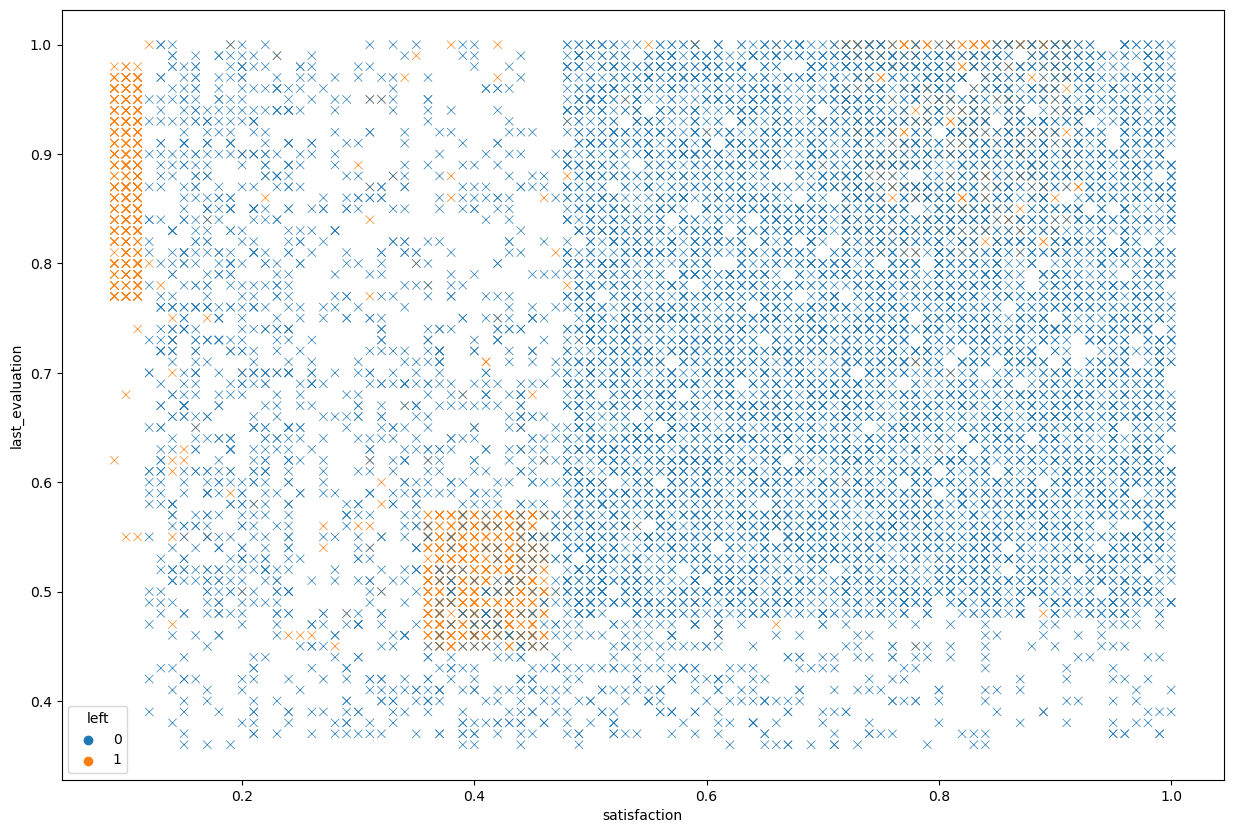

In [17]:
# Scatterplot of 'satisfaction' vs 'last_evaluation' with 'left' as hue
plt.figure(figsize=(15,10))
sns.scatterplot(x=df1['satisfaction'], y=df1['last_evaluation'], hue=df1['left'], marker='x')

<Axes: xlabel='satisfaction', ylabel='department'>

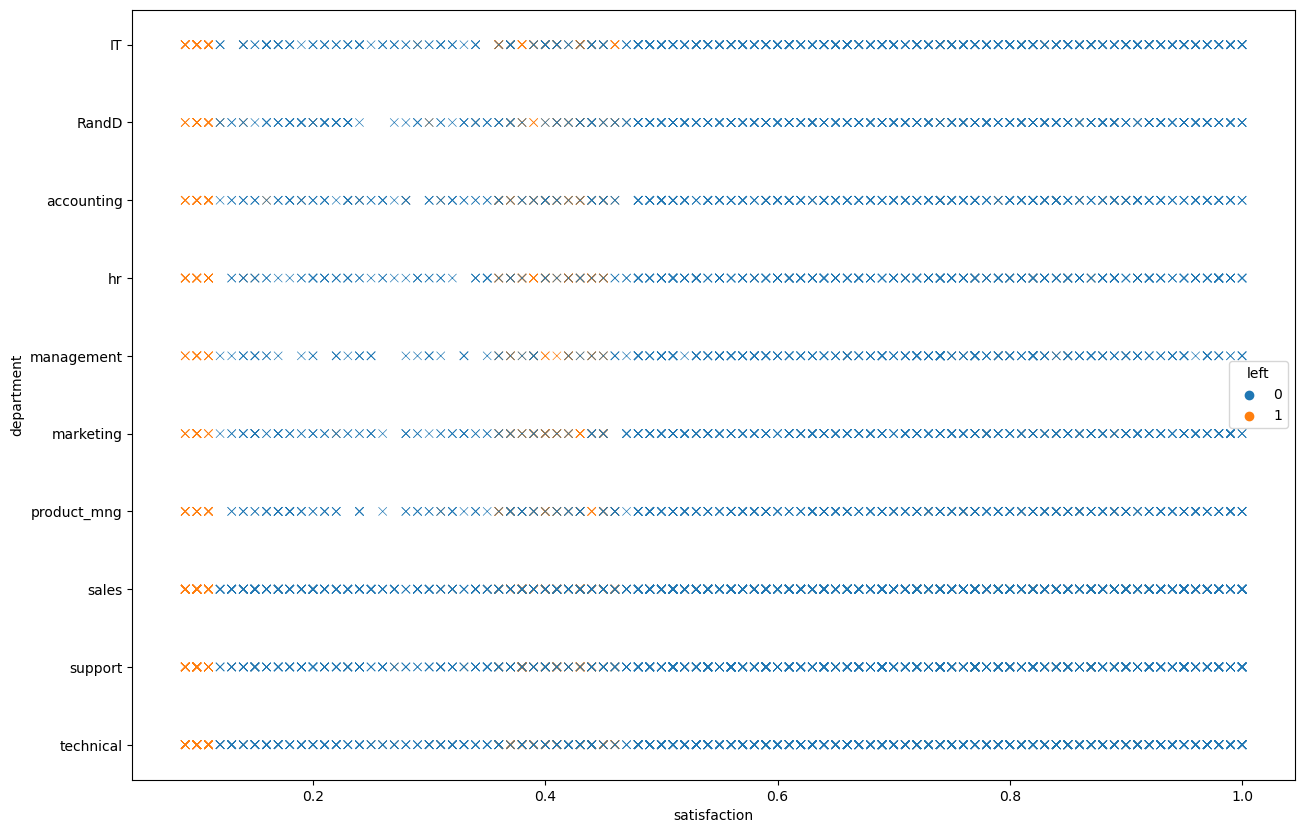

In [18]:
# Scatterplot of 'satisfaction' vs 'department' with 'left' as hue
plt.figure(figsize=(15,10))
sns.scatterplot(x=df1['satisfaction'], y=df1['department'], hue=df1['left'], marker='x')

<Axes: xlabel='satisfaction', ylabel='tenure'>

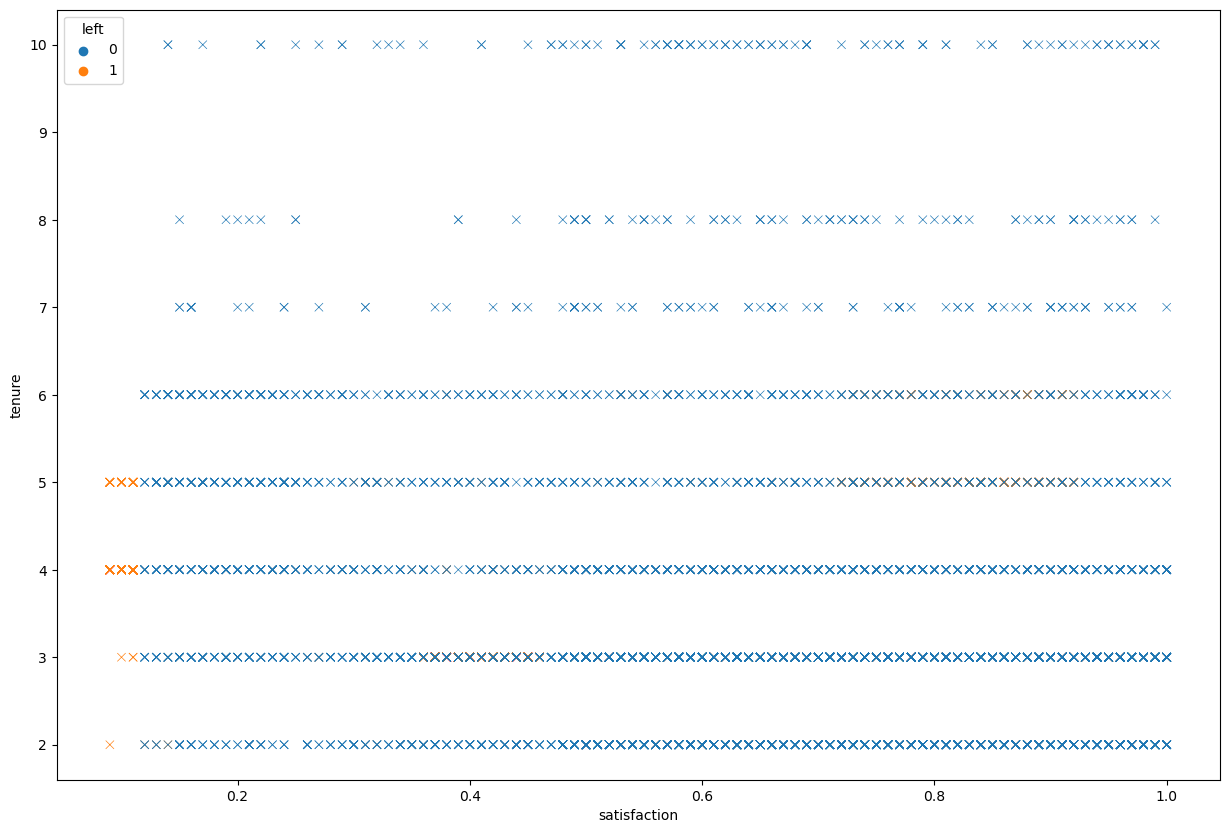

In [19]:
# Scatterplot of 'satisfaction' vs 'tenure' with 'left' as hue
plt.figure(figsize=(15,10))
sns.scatterplot(x=df1['satisfaction'], y=df1['tenure'], hue=df1['left'], marker='x')

<Axes: xlabel='satisfaction', ylabel='promotion_last_5years'>

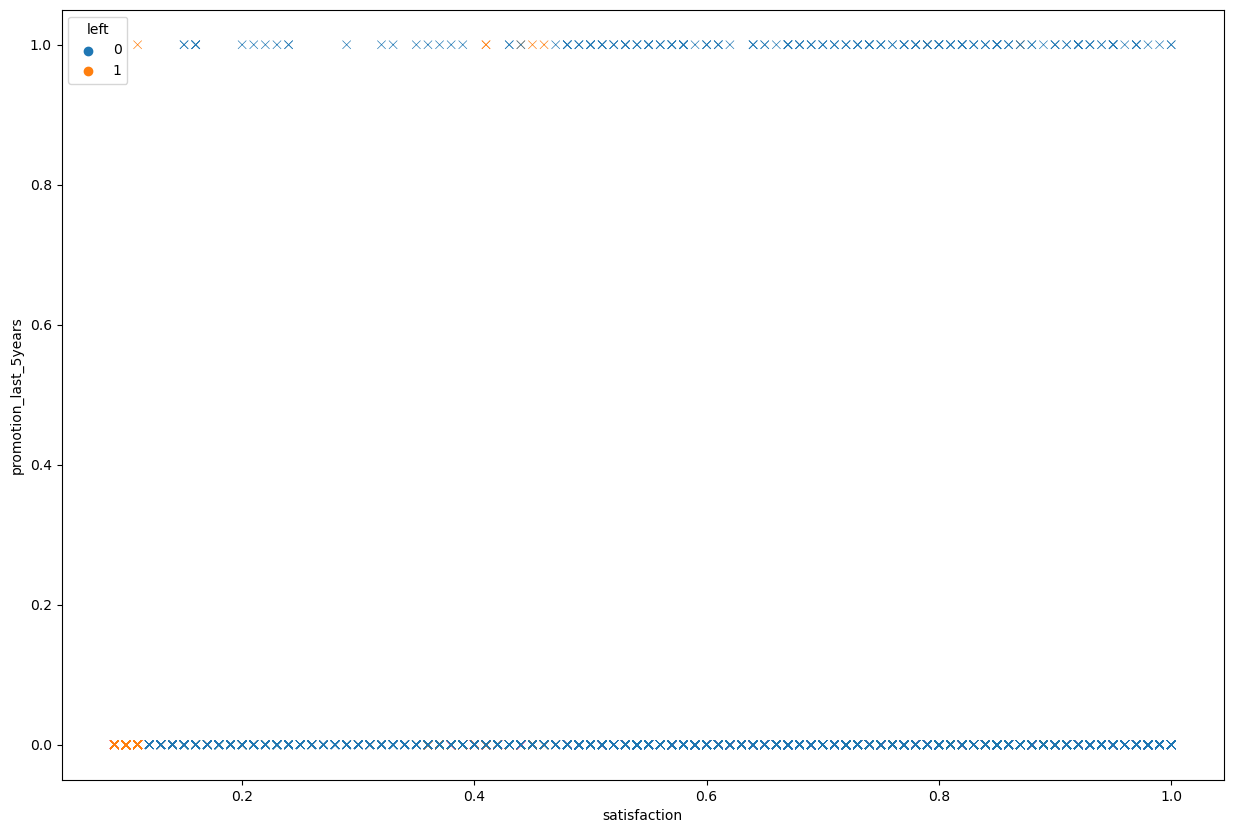

In [20]:
# Scatterplot of 'satisfaction' vs 'promotion_last_5years' with 'left' as hue
plt.figure(figsize=(15,10))
sns.scatterplot(x=df1['satisfaction'], y=df1['promotion_last_5years'], hue=df1['left'], marker='x')

<Axes: xlabel='last_evaluation', ylabel='avg_monthly_hrs'>

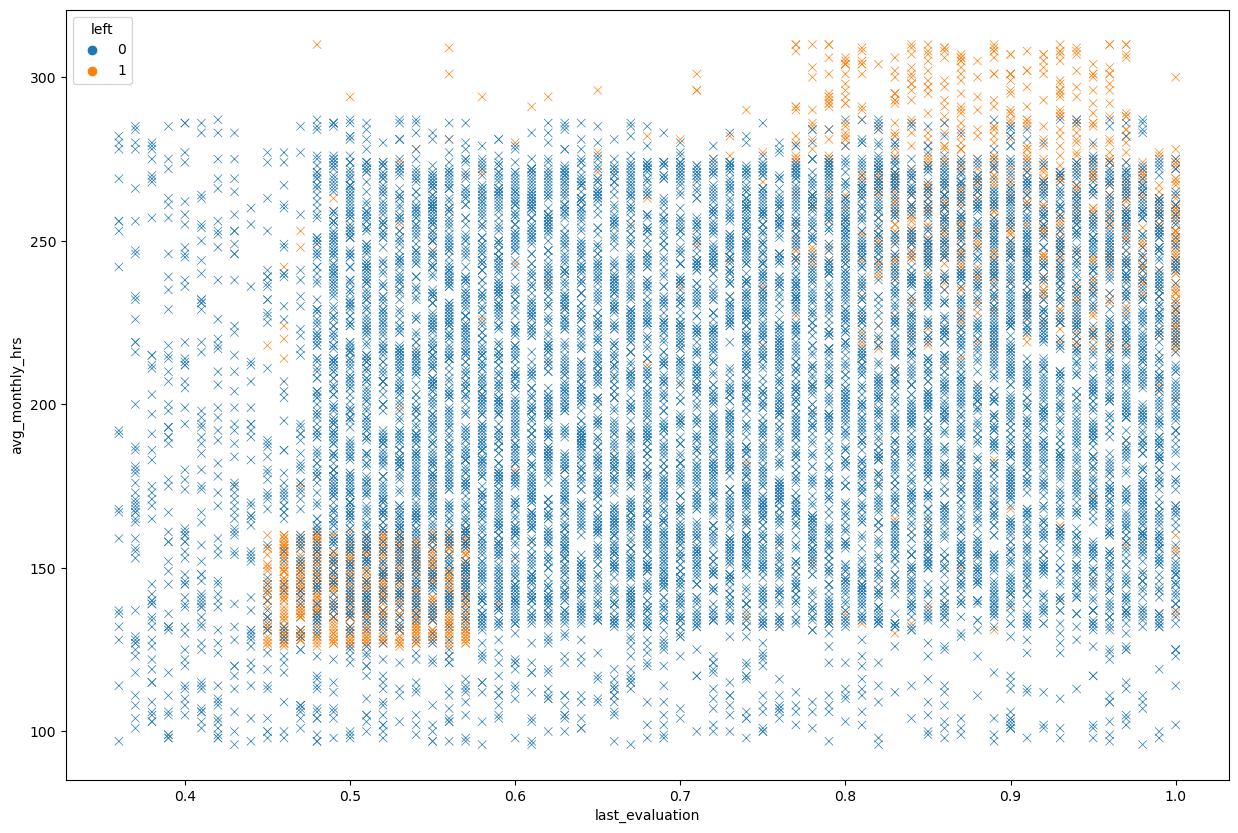

In [21]:
# Scatterplot of 'last_evaluation' vs 'avg_monthly_hrs' with 'left' as hue
plt.figure(figsize=(15,10))
sns.scatterplot(x=df1['last_evaluation'], y=df1['avg_monthly_hrs'], hue=df1['left'], marker='x')

<Axes: xlabel='avg_monthly_hrs', ylabel='projects'>

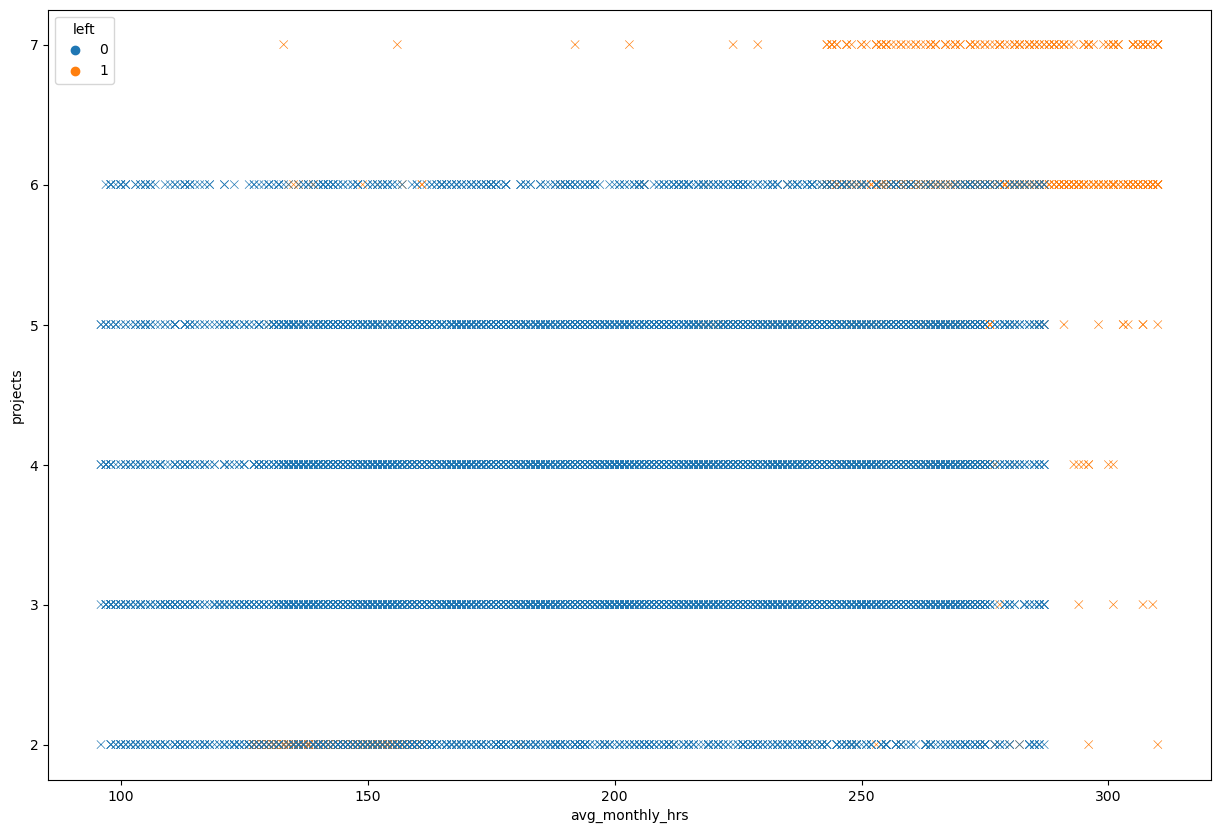

In [22]:
# Scatterplot of 'avg_monthly_hrs' vs 'projects' with 'left' as hue
plt.figure(figsize=(15,10))
sns.scatterplot(x=df1['avg_monthly_hrs'], y=df1['projects'], hue=df1['left'], marker='x')

<Axes: xlabel='tenure'>

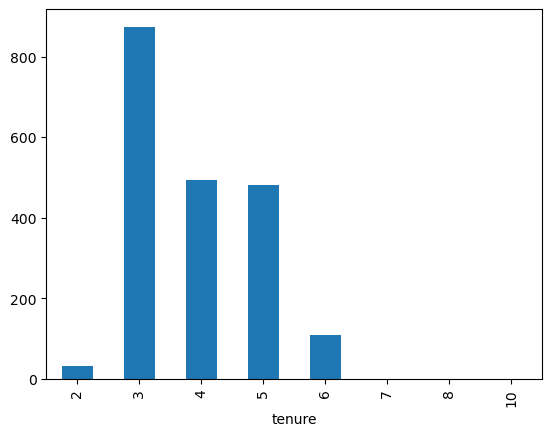

In [23]:
df1.groupby('tenure')['left'].sum().plot(kind='bar')

### Insights :


- There is a negative correlation between satisfaction level and average monthly working hours for employees who are leaving (indicated by the red hue). As the satisfaction level increases, the average monthly working hours decrease. This suggests that employees who work fewer hours tend to be more satisfied and are less likely to leave.
There is a distinct cluster of employees who are leaving at the lower left corner of the plot, where the satisfaction level is below 0.2 and the average monthly working hours are above 250. This indicates that there is a subgroup of employees who are extremely dissatisfied and overworked, and are very likely to leave.
There is another cluster of employees who are leaving at the upper right corner of the plot, where the satisfaction level is above 0.7 and the average monthly working hours are above 250. This indicates that there is another subgroup of employees who are highly satisfied but also overworked, and are likely to leave due to burnout or other reasons.
There is a gap in the middle of the plot, where there are very few employees who are leaving. This indicates that there is a range of satisfaction level and average monthly working hours that are optimal for retaining employees, and that most employees who are staying fall within this range.

- Typically, individuals tend to depart after two years. However, the likelihood of their departure decreses progressively as time elapses.

-For last evaluation vs average monthly hours. Based on the plot, I can see that there are three clusters of employees who left :

Those who had low last evaluations and low average monthly hours. These employees may have been underperforming or disengaged from their work.
Those who had high last evaluations and low average monthly hours. These employees may have been highly skilled or efficient in their work, but may have felt bored or unmotivated by the lack of challenge or opportunity.
Those who had high last evaluations and high average monthly hours. These employees may have been hardworking or ambitious in their work, but may have experienced burnout or stress due to the excessive workload or pressure.
These are some possible interpretations based on the plot. However, as I mentioned before, correlation does not imply causation, and there may be other factors that influence employee turnover. Therefore, it is important to conduct further analysis and research to understand the underlying causes and effects of employee turnover.


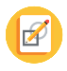
# paCe: Construct Stage



## Step 3. Model Building


### Identify the type of prediction task.

Performing classification based on the "left" column:

* 1 denotes an employee who left.
* 0 denotes an employee who stayed.

### Identify the types of models most appropriate for this task.

We are going to use **Random Forest classifier** for this project

### Encoding

First we need to encode the categorical data for processing 

In [24]:
 le_department = LabelEncoder()
df1['department'] = le_department.fit_transform(df1['department'])
le_salary = LabelEncoder()
df1['salary'] = le_salary.fit_transform(df1['salary'])

x=df1.drop('left',axis=1)
x.head()
y=df1['left']

#### Modeling

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25 ,random_state=42)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)




**Let's evaluate the model using diffrent mertrics**

Accuracy: 0.9829886591060707
Precision: 0.9847826086956522
Recall: 0.9114688128772636
F1 Score: 0.9467084639498433
Confusion Matrix:
 [[2494    7]
 [  44  453]]


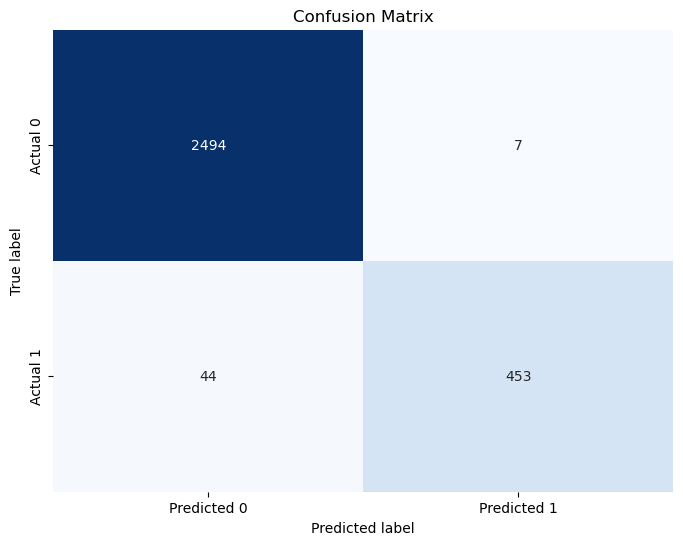

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n {conf_matrix}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

**Lets visualize the Feature Importance Graph to provide insight into which feature has the most significant impact on the model :**

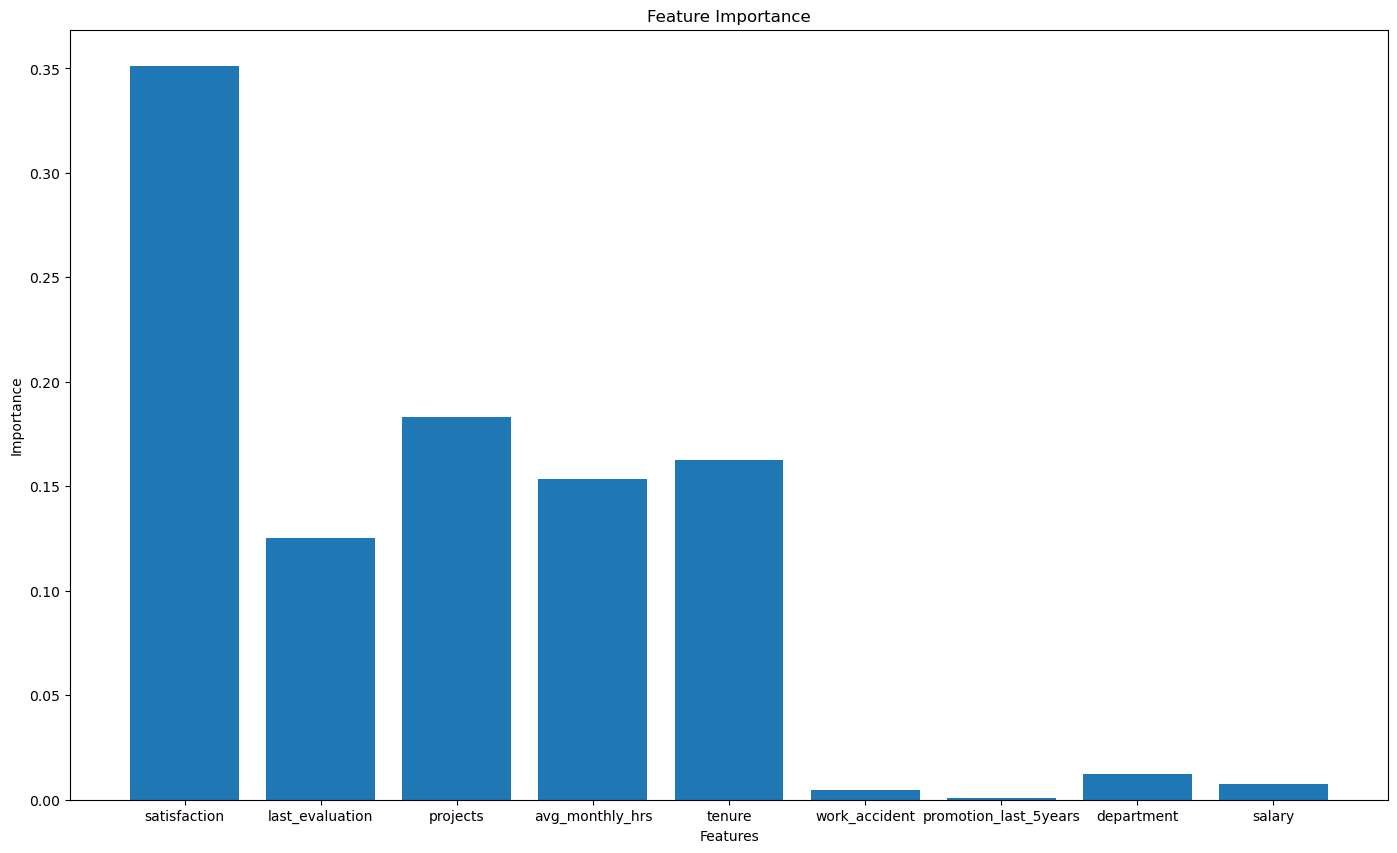

In [27]:
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_
# Create a bar chart of feature importance
plt.figure(figsize=(17,10))
plt.bar(x.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

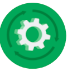
# pacE: Execute Stage




## Step 4. Results and Evaluation





### Summary of model results
* Accuracy: 0.9823215476984657
* Precision: 0.9847161572052402
* Recall: 0.9074446680080482
* F1 Score: 0.9445026178010472

### Conclusion, Recommendations

- Conclusion
    - Random Forest Classifier had very impressive test scores
    - Random Forest Classifier plot_importance showed top ranking influencers of employees leaving:
        - satsifaction
        - projects
        - tenure
        - avg_monthly_hrs
        - last_evaluation
        
        
   ### Recommendations
    Some possible recommendations based on this data are:

- Conduct regular surveys or interviews to measure and improve employee satisfaction level. Identify the sources of dissatisfaction and address them accordingly. For example, provide feedback, recognition, or rewards for good performance; offer training, coaching, or mentoring for skill development; create a positive and supportive work environment; etc.
- Assign projects to employees based on their skills, interests, and availability. Avoid overloading or underloading employees with projects that may cause stress, boredom, or frustration. Provide clear expectations, guidance, and support for each project. Encourage collaboration and communication among team members.
- Recognize and reward employees who have long tenure, as they may have valuable skills, experience, and knowledge that benefit the company. You can offer them bonuses, raises, promotions, or other forms of recognition that show your appreciation for thier loyalty.
- Provide opportunities for employees who have short tenure, as they may be looking for new challenges, learning, and growth. You can offer them mentoring, coaching, training, or other forms of development that help them improve their performance and potential.
- Monitor and regulate the average monthly hours of employees. Ensure that they have a reasonable and balanced workload that matches their capabilities and preferences. Avoid excessive or insufficient working hours that may affect their health, well-being, or productivity. Promote a healthy work-life balance and respect their personal time and space.
- Evaluate employees fairly and objectively based on their performance and potential. Provide constructive feedback and suggestions for improvement. Avoid bias, favoritism, or discrimination that may undermine their confidence, motivation, or morale. Celebrate and share their successes and accomplishments.
